<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/Reduccion_dimensiones_A01796062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno:** Jorge Fernández Lara

**Matrícula:** A01796062

**Materia:** Ciencia y Analítica de Datos



# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


Es importante recordar que para la multiplicación de vectores, la librería de Numpy cuenta con una syntaxis específica. Utilizando la librería Numpy (en este caso al declararla la llamamos np) y posteriormente la función de multiplicación punto.

También resulta importante recordad que se trata de la multiplicación de las tres matrices por lo que se deben de multiplicar por separado. 


Más allá de las operaciones matriciales que se realizarón, pudimos comprobar que después de la descomposición en PCA, se puede volver a componer en la matriz original al realizar "B=W*D*Winv".

In [59]:
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A1)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [69]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original A1-------")
print(A1)
print("-----------------------------")
values1, vectors1 = eig(A1)
print(values1) #D1
print(vectors1) #W1
values1, vectors1 = np.linalg.eig(A1)
W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
print("-------Matriz A1 reconstruida-------")
B1= W1@D1@Winv1
print(B1)
print("-----------------------------")

-------Matriz original A1-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz A1 reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


In [70]:
#Matriz 2

A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original A2-------")
print(A2)
print("-----------------------------")
values2, vectors2 = eig(A2)
print(values2) #D2
print(vectors2) #W2
values2, vectors2 = np.linalg.eig(A2)
W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)
print("-------Matriz A2 reconstruida-------")
B2= W2@D2@Winv2
print(B2)
print("-----------------------------")

-------Matriz original A2-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz A2 reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


In [71]:
#Matriz 3

A3 = array([[5, 4, 0], [1, 0, 1], [0, 7, 1]])
print("-------Matriz original A3-------")
print(A3)
print("-----------------------------")
values3, vectors3 = eig(A3)
print(values3) #D3
print(vectors3) #W3
values3, vectors3 = np.linalg.eig(A3)
W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)
print("-------Matriz A3 reconstruida-------")
B3= W3@D3@Winv3
print(B3)
print("-----------------------------")

-------Matriz original A3-------
[[5 4 0]
 [1 0 1]
 [0 7 1]]
-----------------------------
[-2.52033703  5.89568521  2.62465182]
[[-0.2324281  -0.93143255 -0.35580305]
 [ 0.43698442 -0.20856759  0.21128903]
 [-0.8689199  -0.2982163   0.91036319]]
-------Matriz A3 reconstruida-------
[[ 5.00000000e+00  4.00000000e+00  8.63074545e-16]
 [ 1.00000000e+00 -1.42563811e-15  1.00000000e+00]
 [ 1.65511814e-15  7.00000000e+00  1.00000000e+00]]
-----------------------------


Es interesante que en la reconstrucción de las matrices los números fueron muy pequeños en vez de cero, al readondear los valores será igual al reconstruido.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


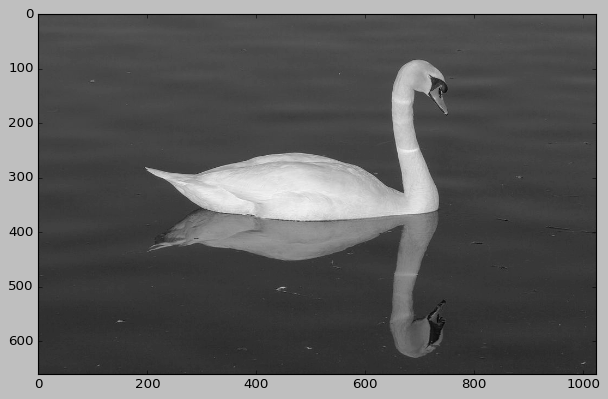

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F8D7AD1DF10>


In [3]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [4]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [5]:
U.shape

(660, 660)

In [6]:
V.shape

(1024, 1024)

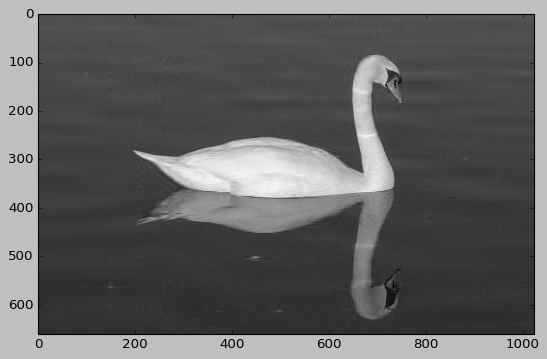

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

Al cambiar los valores de "nvalue" podemos reducir mucho la imágen y perder mucha información, al grado que se ve "pixeleada" la imágen de Lucy.

¡Ahora es tu turno!, comprime 3 imagenes

[244. 244. 244. ...  28.  28.  28.]


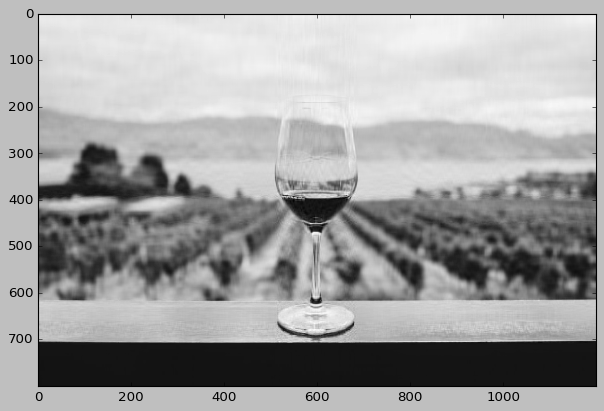

In [22]:
#imagen 1
plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/09/vino.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])
U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape
plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
#plt.show()
nvalue = 50
reconstimg1 = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])
plt.imshow(reconstimg1,cmap='gray')
plt.show()

[151. 151. 151. ...  67.  67.  70.]


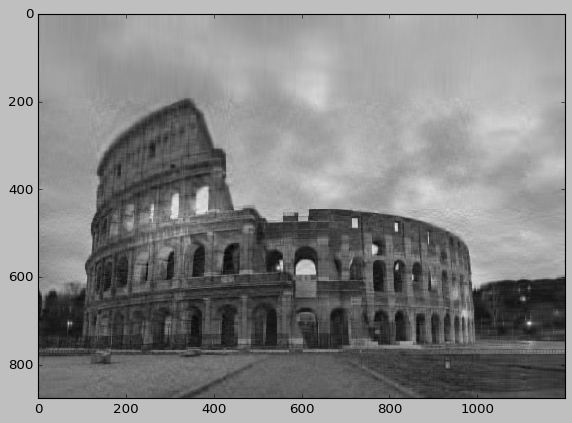

In [29]:
#imagen 2
plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/06/coliseo-roma.jpg')).convert('LA')
imggray2 = img2.convert('LA')

imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape
plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
#plt.show()
nvalue = 50
reconstimg2 = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()

[106.  84.  57. ...  21.  25.  30.]


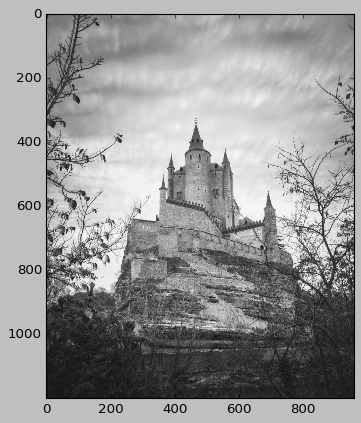

In [34]:
#imagen 3
plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2021/07/alcazar-segovia.jpg')).convert('LA')
imggray3 = img3.convert('LA')

imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape
plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
#plt.show()
nvalue = 500
reconstimg3 = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




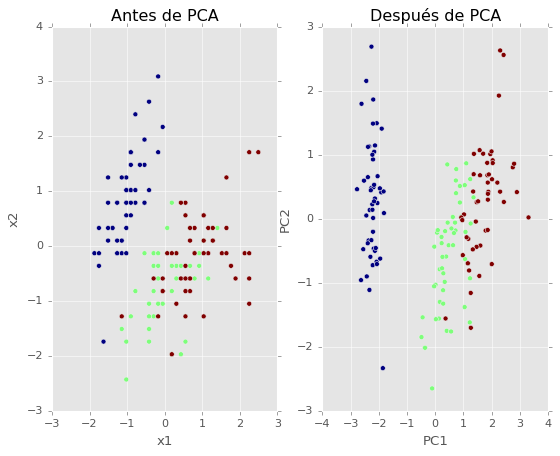

[0.72962445 0.22850762]


array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [38]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Cargamos los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score las caracteristicas
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# El modelo PCA
pca = PCA(n_components=2) # estima sólo 2 Componentes Principales
X_new = pca.fit_transform(X) # Los datos originales en el espacio de Componentes principales
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después de PCA')
plt.show()
print(pca.explained_variance_ratio_)
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [39]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projección en PC1
    ys = score[:,1] # projección en PC2
    n = coeff.shape[0] # número de variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color basado en grupo
    for i in range(n):
        #grafica como flechas la variable "scores" (cada variable tiene un puntaje para PC1 y uno para PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

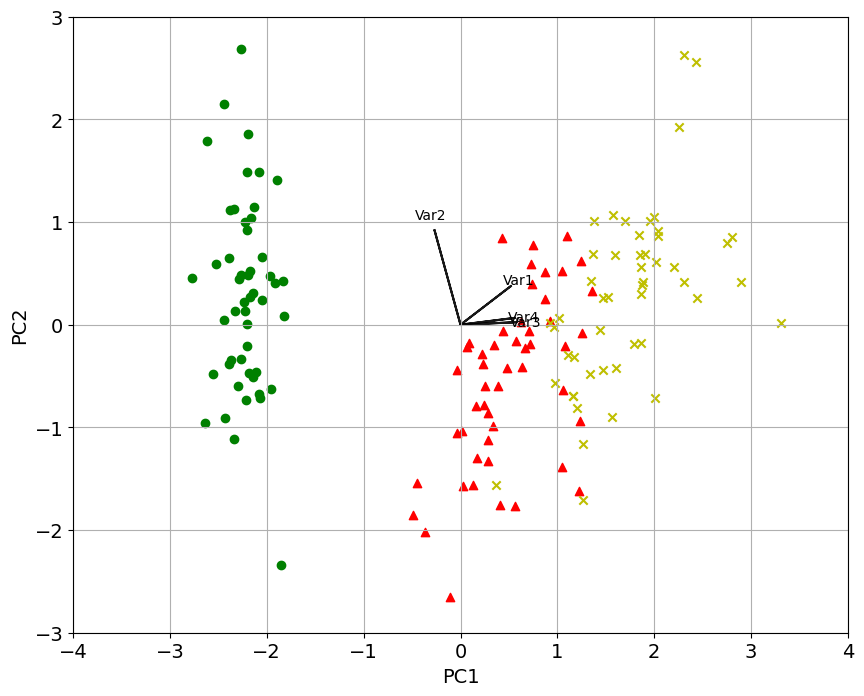

In [40]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # rreinicia el estilo ggplot
# Llama la función biplot para los primeros dos componentes principales
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [42]:
# Las variables 3 y 4 son correlacionadas de forma positiva
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [43]:
# Las Variables 2 y 3 están correlacionadas de forma negativa
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

El análisis de Componentes Principales (PCA) nos permitió cambiar el  conjunto de datos a los componentes principales, donde pudimos identificar de forma clara para los datos de iris sus componentes principales y se logró reducir la variabilidad entre ellas. Este tipo de análisis seguramente nos ayudará a poder análizar conjuntos de datos más complejos.

**¿Qué es feature importance y para que nos sirve?**

Es una calificación que nos permite identificar la importancia que tiene cada variable. Esto nos sirve para poder seleccionar las variables con mayor importancia en nuestro modelo, de tal forma que trabajemos en estas y no en variables con poca importancia e impacto.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

El método de PCA es un método no supervisado que nos ayuda a capturar la mayoría de la varianza en pocos conjuntos (Componentes principales). Fue muy importante que despúés de analizar los datos con el componente principal 1 (PC1) logramos explicar el 73% de la varianza, y el componente principal 2 (PC2) sólo el 22% pero juntos podemos tener el 95% de la varianza explicada.

También es importante que existen métodos como el biplot que permiten identificar de forma gráfica las variables dentro de cada Componente Principal con mayor importancia. De esta forma, podemos identificar la varianza explicada por cada Componente Principal, así como las variables con mayor importancia.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

PCA es útil para visualizar datos multidimensionales, tales como estudios médicos o el análisis de imágenes. En mi caso particular pienso que será de utilidad en el modelo para predecir el comportamiento del procesamiento y destrucción de billete deteriorado en Banco de México, donde se utiliza un gran número de variables como denominación, sitio de depósito, fecha de depósito, institución de crédito depositante, tiempo de almacenamiento, etc. y que un análisis con Componentes Principales ayudaría para un acercamiento más eficiente.